### The purpose of the challenge.  

 - Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

 - First, load the dataset.

 - Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

 - Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

 - In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

 - Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

### 1. First, load the dataset.

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from sqlalchemy import create_engine

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

user = 'dsbc_student'
pw = '7*.8G9QH21'
host = '142.93.121.174'
port = '5432'
db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(user, pw, host, port, db))

life_df = pd.read_sql_query('select * from lifeexpectancy', con=engine)
engine.dispose()

In [91]:
life_df.head()

Country  Year  ... Income composition of resources  Schooling
0  Afghanistan  2015  ...                           0.479       10.1
1  Afghanistan  2014  ...                           0.476       10.0
2  Afghanistan  2013  ...                           0.470        9.9
3  Afghanistan  2012  ...                           0.463        9.8
4  Afghanistan  2011  ...                           0.454        9.5

[5 rows x 22 columns]

In [92]:
pd.set_option('display.max_columns', False)
pd.set_option('display.max_rows', 10000)

In [93]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [94]:
life_df.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

### 2. Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

In [95]:
life_df['Life expectancy '].count()

2928

In [96]:
life_df.head()

Country  Year  ... Income composition of resources  Schooling
0  Afghanistan  2015  ...                           0.479       10.1
1  Afghanistan  2014  ...                           0.476       10.0
2  Afghanistan  2013  ...                           0.470        9.9
3  Afghanistan  2012  ...                           0.463        9.8
4  Afghanistan  2011  ...                           0.454        9.5

[5 rows x 22 columns]

Regarding the missing data, firstly we should check out the correlation between the missing data and others.  
And then fill out the missing data with the highest correlation value variable.

In [97]:
from scipy.stats import stats

life_corr = life_df.corr()
life_corr

Year  ...  Schooling
Year                             1.000000  ...   0.209400
Life expectancy                  0.170033  ...   0.751975
Adult Mortality                 -0.079052  ...  -0.454612
infant deaths                   -0.037415  ...  -0.193720
Alcohol                         -0.052990  ...   0.547378
percentage expenditure           0.031400  ...   0.389687
Hepatitis B                      0.104333  ...   0.231117
Measles                         -0.082493  ...  -0.137225
 BMI                             0.108974  ...   0.546961
under-five deaths               -0.042937  ...  -0.209373
Polio                            0.094158  ...   0.417866
Total expenditure                0.090740  ...   0.246384
Diphtheria                       0.134337  ...   0.425332
 HIV/AIDS                       -0.139741  ...  -0.220429
GDP                              0.101620  ...   0.448273
Population                       0.016969  ...  -0.031668
 thinness  1-19 years           -0.047876  ...  -0.471652
 thinness 5-9 years             -0.050929  ...  -0.460632
Income composition of resources  0.243468  ...   0.800092
Schooling                        0.209400  ...   1.000000

[20 rows x 20 columns]

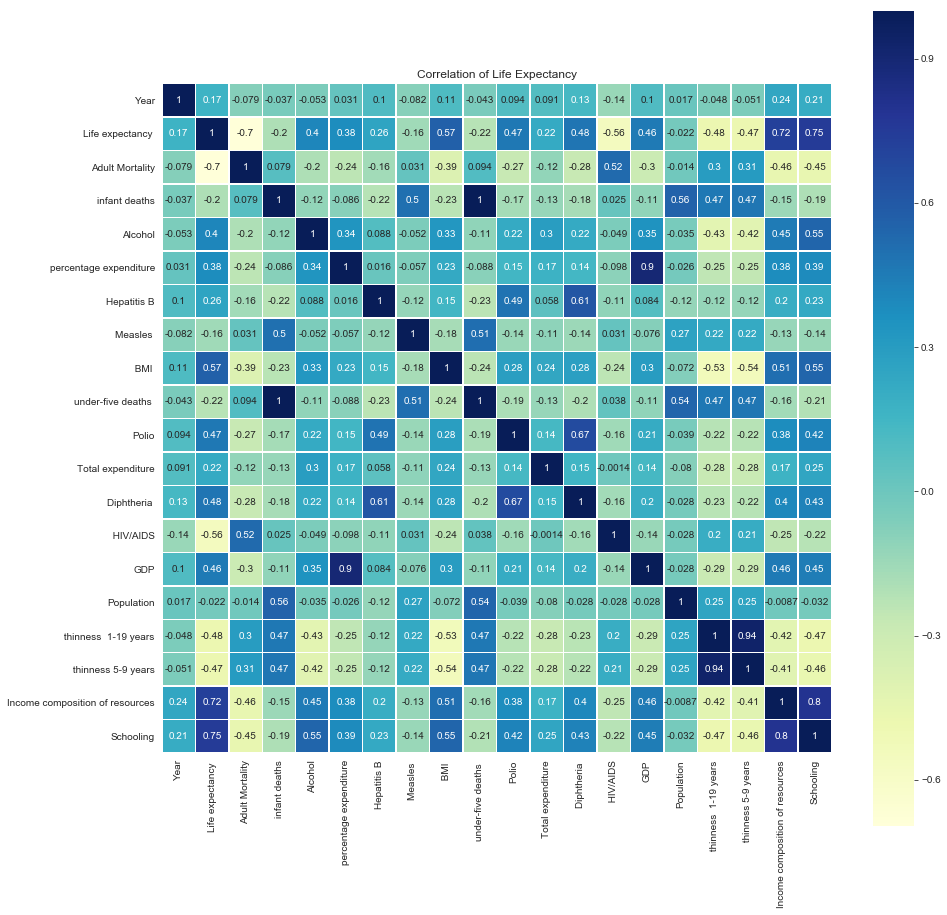

In [98]:
plt.figure(figsize=(15,15))
sns.heatmap(life_corr, square = True, annot=True, linewidths=0.5, cmap="YlGnBu")
plt.title('Correlation of Life Expectancy')
plt.show()

In [99]:
life_df_Korea = life_df[life_df['Country'] == 'Republic of Korea']

In [100]:
life_df_Korea

Country  Year  ... Income composition of resources  Schooling
2088  Republic of Korea  2015  ...                             NaN        NaN
2089  Republic of Korea  2014  ...                             NaN        NaN
2090  Republic of Korea  2013  ...                             NaN        NaN
2091  Republic of Korea  2012  ...                             NaN        NaN
2092  Republic of Korea  2011  ...                             NaN        NaN
2093  Republic of Korea  2010  ...                             NaN        NaN
2094  Republic of Korea  2009  ...                             NaN        NaN
2095  Republic of Korea  2008  ...                             NaN        NaN
2096  Republic of Korea  2007  ...                             NaN        NaN
2097  Republic of Korea  2006  ...                             NaN        NaN
2098  Republic of Korea  2005  ...                             NaN        NaN
2099  Republic of Korea  2004  ...                             NaN        NaN
2100  Republic of Korea  2003  ...                             NaN        NaN
2101  Republic of Korea  2002  ...                             NaN        NaN
2102  Republic of Korea  2001  ...                             NaN        NaN
2103  Republic of Korea  2000  ...                             NaN        NaN

[16 rows x 22 columns]

In [101]:
life_Korea_corr = life_df_Korea.corr()
life_Korea_corr

Year  ...  Schooling
Year                             1.000000  ...        NaN
Life expectancy                  0.729849  ...        NaN
Adult Mortality                 -0.300907  ...        NaN
infant deaths                   -0.933456  ...        NaN
Alcohol                         -0.540429  ...        NaN
percentage expenditure                NaN  ...        NaN
Hepatitis B                      0.705754  ...        NaN
Measles                         -0.568104  ...        NaN
 BMI                            -0.288003  ...        NaN
under-five deaths               -0.851583  ...        NaN
Polio                            0.202827  ...        NaN
Total expenditure                0.989343  ...        NaN
Diphtheria                       0.308847  ...        NaN
 HIV/AIDS                        0.000000  ...        NaN
GDP                                   NaN  ...        NaN
Population                            NaN  ...        NaN
 thinness  1-19 years           -0.840168  ...        NaN
 thinness 5-9 years             -0.677365  ...        NaN
Income composition of resources       NaN  ...        NaN
Schooling                             NaN  ...        NaN

[20 rows x 20 columns]

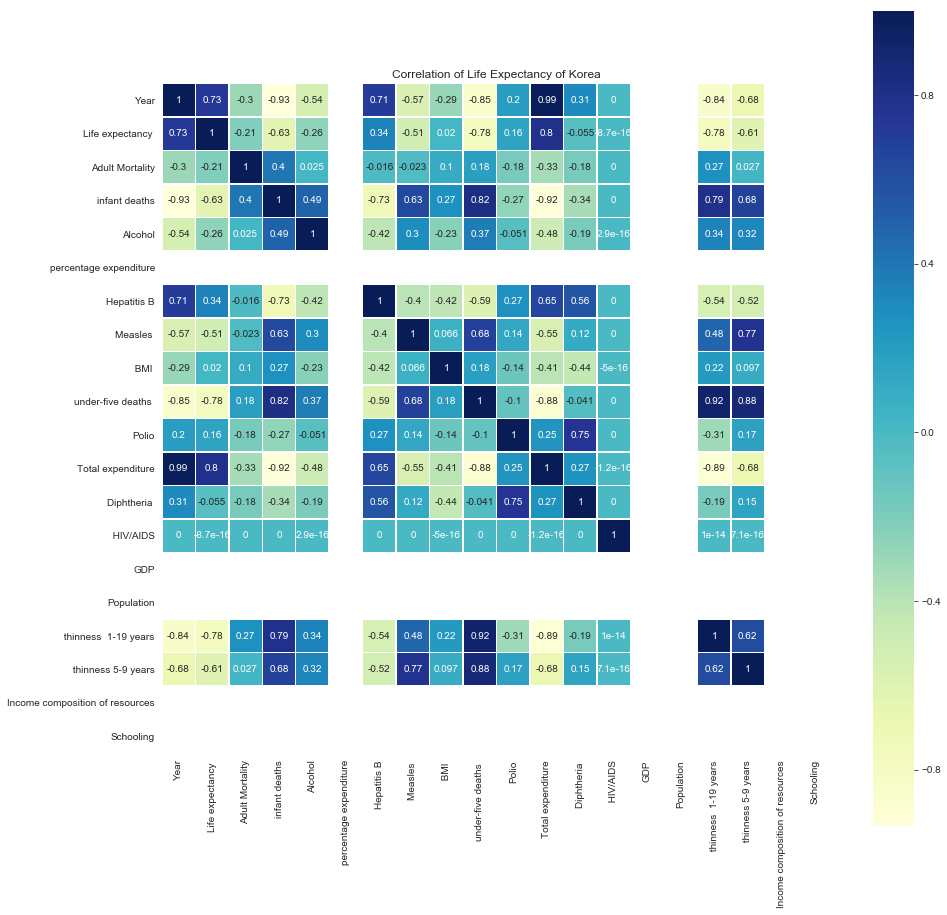

In [102]:
plt.figure(figsize=(15,15))
sns.heatmap(life_Korea_corr, square = True, annot=True, linewidths=0.5, cmap="YlGnBu")
plt.title('Correlation of Life Expectancy of Korea')
plt.show()

In [103]:
life_df.head()

Country  Year  ... Income composition of resources  Schooling
0  Afghanistan  2015  ...                           0.479       10.1
1  Afghanistan  2014  ...                           0.476       10.0
2  Afghanistan  2013  ...                           0.470        9.9
3  Afghanistan  2012  ...                           0.463        9.8
4  Afghanistan  2011  ...                           0.454        9.5

[5 rows x 22 columns]

In [104]:
life_df.sort_values(by='Life expectancy ', ascending=False)

Country  ...  Schooling
916                                             Finland  ...       17.0
1917                                             Norway  ...       17.4
2513                                             Sweden  ...       15.8
1294                                              Italy  ...       15.6
242                                             Belgium  ...       16.3
939                                              France  ...       16.1
2057                                           Portugal  ...       16.8
1851                                        New Zealand  ...       20.3
938                                              France  ...       16.1
2433                                              Spain  ...       16.0
996                                             Germany  ...       17.0
2345                                           Slovenia  ...       17.3
2514                                             Sweden  ...       15.9
1293                                              Italy  ...       15.8
1028                                             Greece  ...       17.2
1182                                            Iceland  ...       18.3
1543                                         Luxembourg  ...       13.9
2434                                              Spain  ...       15.9
1835                                        Netherlands  ...       17.0
133                                             Austria  ...       15.7
132                                             Austria  ...       15.7
243                                             Belgium  ...       16.3
2323                                          Singapore  ...       13.9
917                                             Finland  ...       17.0
2346                                           Slovenia  ...       17.6
1183                                            Iceland  ...       17.6
503                                              Canada  ...       15.8
2764  United Kingdom of Great Britain and Northern I...  ...        NaN
1639                                              Malta  ...       14.8
2093                                  Republic of Korea  ...        NaN
1850                                        New Zealand  ...       19.7
998                                             Germany  ...       16.9
940                                              France  ...       16.1
997                                             Germany  ...       16.9
1836                                        Netherlands  ...       16.9
1918                                             Norway  ...       17.6
124                                           Australia  ...       20.7
2058                                           Portugal  ...       16.3
1029                                             Greece  ...       17.1
2765  United Kingdom of Great Britain and Northern I...  ...        NaN
2766  United Kingdom of Great Britain and Northern I...  ...        NaN
2094                                  Republic of Korea  ...        NaN
1256                                            Ireland  ...       18.2
737                                             Denmark  ...       19.2
1544                                         Luxembourg  ...       13.7
2515                                             Sweden  ...       16.0
1852                                        New Zealand  ...       19.3
1254                                            Ireland  ...       18.5
504                                              Canada  ...       15.8
1031                                             Greece  ...       16.7
505                                              Canada  ...       15.8
544                                               Chile  ...       16.3
999                                             Germany  ...       16.8
1919                                             Norway  ...       17.6
2347                                           Slovenia  ...       16.8
673             

In [105]:
life_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [106]:
life_df_nonull = life_df.dropna()
life_df_nonull

Country  ...  Schooling
0                  Afghanistan  ...       10.1
1                  Afghanistan  ...       10.0
2                  Afghanistan  ...        9.9
3                  Afghanistan  ...        9.8
4                  Afghanistan  ...        9.5
5                  Afghanistan  ...        9.2
6                  Afghanistan  ...        8.9
7                  Afghanistan  ...        8.7
8                  Afghanistan  ...        8.4
9                  Afghanistan  ...        8.1
10                 Afghanistan  ...        7.9
11                 Afghanistan  ...        6.8
12                 Afghanistan  ...        6.5
13                 Afghanistan  ...        6.2
14                 Afghanistan  ...        5.9
15                 Afghanistan  ...        5.5
16                     Albania  ...       14.2
17                     Albania  ...       14.2
18                     Albania  ...       14.2
19                     Albania  ...       14.2
20                     Albania  ...       13.3
21                     Albania  ...       12.5
22                     Albania  ...       12.2
23                     Albania  ...       12.0
24                     Albania  ...       11.6
25                     Albania  ...       11.4
26                     Albania  ...       10.8
27                     Albania  ...       10.9
28                     Albania  ...       10.7
29                     Albania  ...       10.7
30                     Albania  ...       10.6
31                     Albania  ...       10.7
33                     Algeria  ...       14.4
34                     Algeria  ...       14.4
35                     Algeria  ...       14.4
36                     Algeria  ...       14.0
38                     Algeria  ...       13.6
39                     Algeria  ...       13.1
40                     Algeria  ...       12.6
41                     Algeria  ...       12.3
42                     Algeria  ...       12.3
43                     Algeria  ...       12.0
44                     Algeria  ...       11.7
50                      Angola  ...       11.4
51                      Angola  ...       11.4
52                      Angola  ...       10.3
53                      Angola  ...        9.4
54                      Angola  ...        9.0
55                      Angola  ...        8.5
56                      Angola  ...        8.1
57                      Angola  ...        7.7
82                   Argentina  ...       17.3
83                   Argentina  ...       17.3
84                   Argentina  ...       17.2
85                   Argentina  ...       17.1
86                   Argentina  ...       16.8
87                   Argentina  ...       16.5
88                   Argentina  ...       16.3
89                   Argentina  ...       16.3
90                   Argentina  ...       16.1
91                   Argentina  ...       16.3
92                   Argentina  ...       16.3
93                   Argentina  ...       16.4
94                   Argentina  ...       16.3
98                     Armenia  ...       12.7
99                     Armenia  ...       12.7
100                    Armenia  ...       12.7
101                    Armenia  ...       12.7
102                    Armenia  ...       12.3
103                    Armenia  ...       11.9
104                    Armenia  ...       12.3
105                    Armenia  ...       11.7
106                    Armenia  ...       11.2
107                    Armenia  ...       10.9
108                    Armenia  ...       10.9
109                    Armenia  ...       10.8
110                    Armenia  ...       10.8
111                    Armenia  ...       11.1
112                    Armenia  ...       11.2
114                  Australia  ...       20.4
115                  Australia  ...       20.3
116                  Australia  ...       20.1
117                  Australia  ...       19.8
118                  Australia  ...       19.5
119                  Austral

In [107]:
life_df_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
Country                            1649 non-null object
Year                               1649 non-null int64
Status                             1649 non-null object
Life expectancy                    1649 non-null float64
Adult Mortality                    1649 non-null float64
infant deaths                      1649 non-null int64
Alcohol                            1649 non-null float64
percentage expenditure             1649 non-null float64
Hepatitis B                        1649 non-null float64
Measles                            1649 non-null int64
 BMI                               1649 non-null float64
under-five deaths                  1649 non-null int64
Polio                              1649 non-null float64
Total expenditure                  1649 non-null float64
Diphtheria                         1649 non-null float64
 HIV/AIDS                          1649 non-null

In [108]:
life_df_nonull_corr = life_df_nonull.corr()

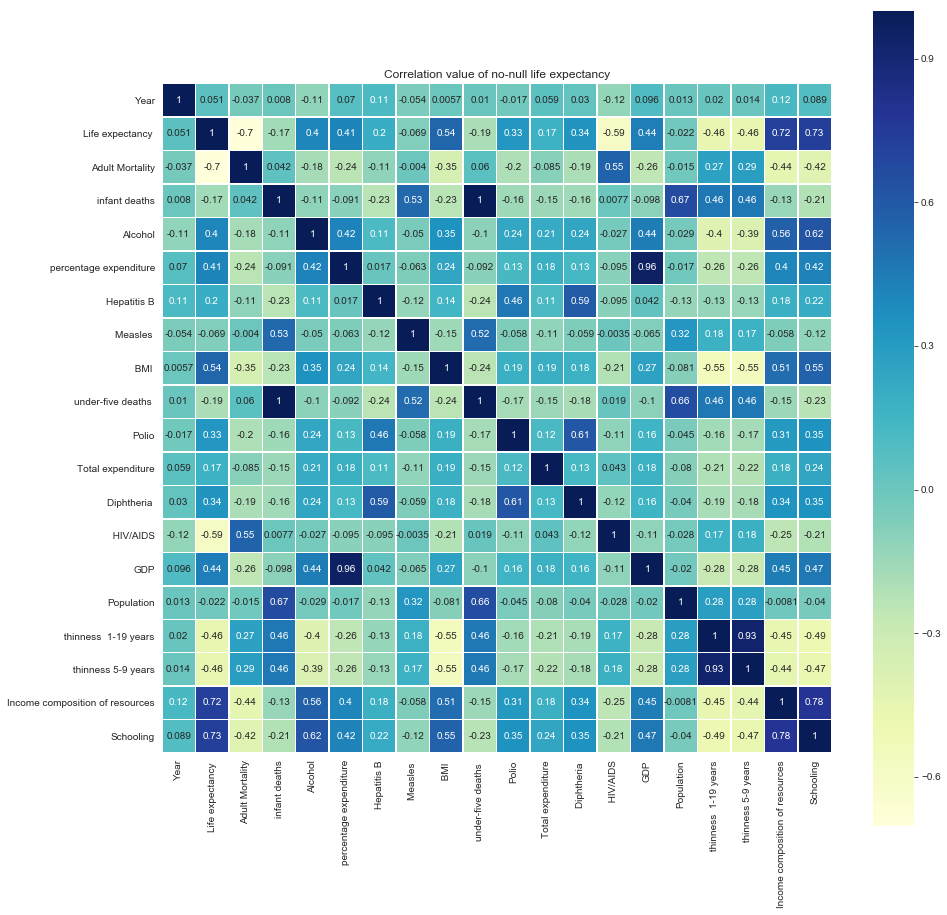

In [109]:
plt.figure(figsize=(15,15))
sns.heatmap(life_df_nonull_corr, square=True, annot=True, linewidths=0.5, cmap="YlGnBu")
plt.title('Correlation value of no-null life expectancy')
plt.show()

In [110]:
life_df.sort_values(by='GDP', ascending=False)

Country  ...  Schooling
1540                                         Luxembourg  ...       13.9
1543                                         Luxembourg  ...       13.9
1546                                         Luxembourg  ...       13.5
1541                                         Luxembourg  ...       13.9
1548                                         Luxembourg  ...       13.5
2075                                              Qatar  ...       13.4
2525                                        Switzerland  ...       15.6
1916                                             Norway  ...       17.4
2073                                              Qatar  ...       13.4
2076                                              Qatar  ...       12.4
2522                                        Switzerland  ...       15.9
1919                                             Norway  ...       17.6
2523                                        Switzerland  ...       15.8
2524                                        Switzerland  ...       15.7
2079                                              Qatar  ...       11.7
1550                                         Luxembourg  ...       13.5
2526                                        Switzerland  ...       15.4
1920                                             Norway  ...       17.5
2528                                        Switzerland  ...       15.3
2527                                        Switzerland  ...       15.3
1179                                            Iceland  ...       18.2
115                                           Australia  ...       20.3
116                                           Australia  ...       20.1
1921                                             Norway  ...       17.6
2072                                              Qatar  ...       13.4
1551                                         Luxembourg  ...       13.6
744                                             Denmark  ...       16.8
2529                                        Switzerland  ...       15.3
738                                             Denmark  ...       19.2
117                                           Australia  ...       19.8
114                                           Australia  ...       20.4
741                                             Denmark  ...       16.9
2078                                              Qatar  ...       11.8
1259                                            Ireland  ...       17.6
1258                                            Ireland  ...       17.9
739                                             Denmark  ...       18.7
2509                                             Sweden  ...       16.0
745                                             Denmark  ...       16.7
743                                             Denmark  ...       16.8
2530                                        Switzerland  ...       15.2
2508                                             Sweden  ...       15.8
1837                                        Netherlands  ...       16.8
113                                           Australia  ...       20.4
2315                                          Singapore  ...       15.4
1181                                            Iceland  ...       17.9
2512                                             Sweden  ...       15.7
1178                                            Iceland  ...       18.2
1402                                             Kuwait  ...       13.8
2531                                        Switzerland  ...       15.2
2317                                          Singapore  ...       15.4
1260                                            Ireland  ...       17.6
2314                                          Singapore  ...       15.4
2513                                             Sweden  ...       15.8
2532                                        Switzerland  ...       15.1
2318                                          Singapore  ...       15.2
1255            

In [111]:
life_df.max()

Country                               Zimbabwe
Year                                      2015
Status                              Developing
Life expectancy                             89
Adult Mortality                            723
infant deaths                             1800
Alcohol                                  17.87
percentage expenditure                 19479.9
Hepatitis B                                 99
Measles                                 212183
 BMI                                      87.3
under-five deaths                         2500
Polio                                       99
Total expenditure                         17.6
Diphtheria                                  99
 HIV/AIDS                                 50.6
GDP                                     119173
Population                         1.29386e+09
 thinness  1-19 years                     27.7
 thinness 5-9 years                       28.6
Income composition of resources          0.948
Schooling    

In [112]:
life_df.min()

Country                            Afghanistan
Year                                      2000
Status                               Developed
Life expectancy                           36.3
Adult Mortality                              1
infant deaths                                0
Alcohol                                   0.01
percentage expenditure                       0
Hepatitis B                                  1
Measles                                      0
 BMI                                         1
under-five deaths                            0
Polio                                        3
Total expenditure                         0.37
Diphtheria                                   2
 HIV/AIDS                                  0.1
GDP                                    1.68135
Population                                  34
 thinness  1-19 years                      0.1
 thinness 5-9 years                        0.1
Income composition of resources              0
Schooling    

In [113]:
life_df.sort_values(by='Population').head()

Country  Year  ... Income composition of resources  Schooling
1615  Maldives  2003  ...                           0.601       11.8
1609  Maldives  2009  ...                           0.651       11.8
1604  Maldives  2014  ...                           0.693       12.7
986    Georgia  2008  ...                           0.735       13.1
1160   Hungary  2010  ...                           0.817       15.3

[5 rows x 22 columns]

At this stage, I am going to look into each variable to figure out if there are the outlier values or not with visual and statistial method.  

First of all, let's draw histogram of each variable.

Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error


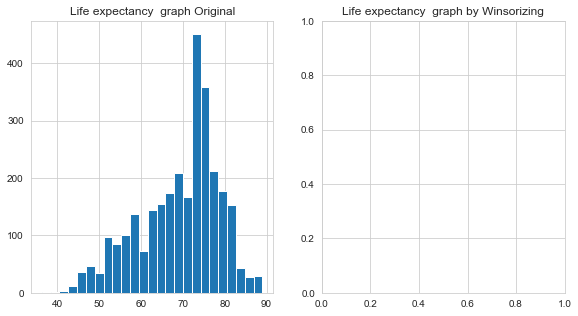

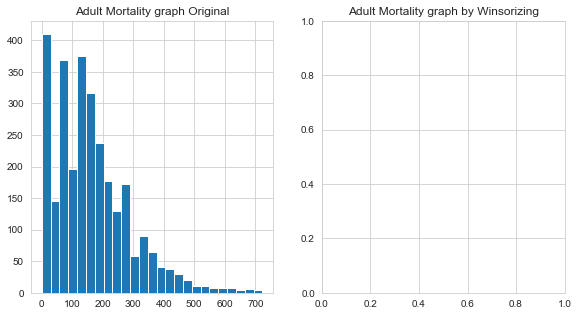

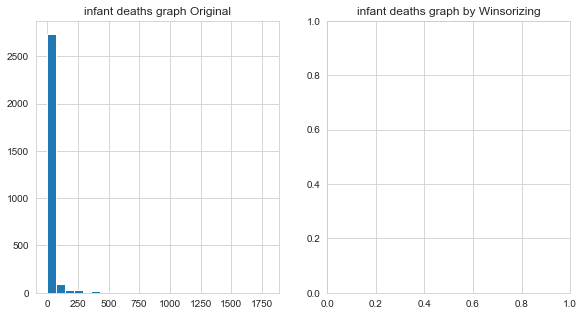

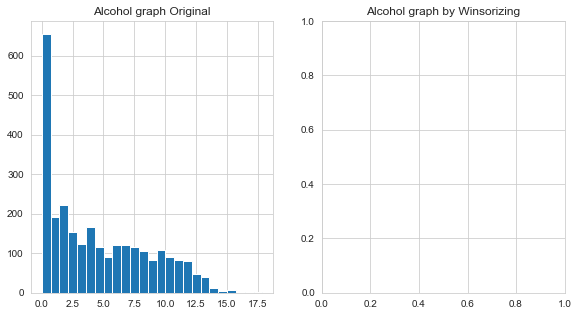

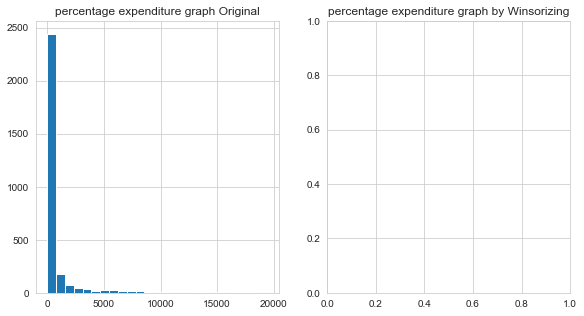

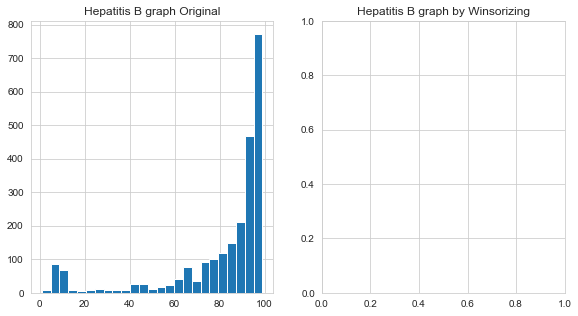

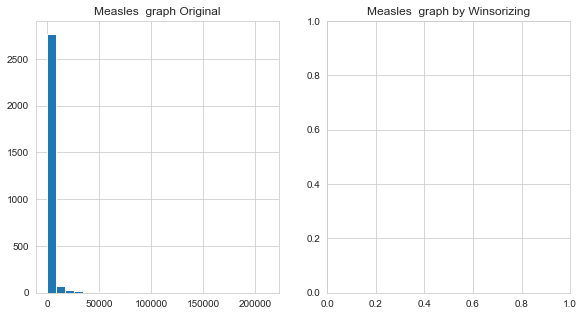

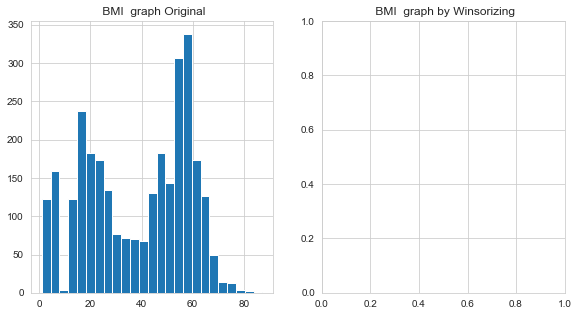

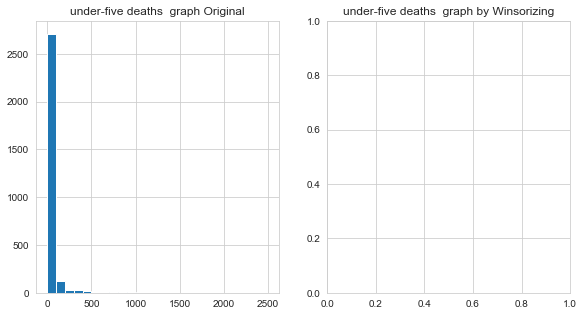

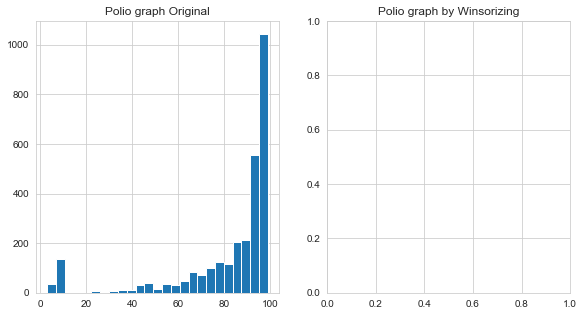

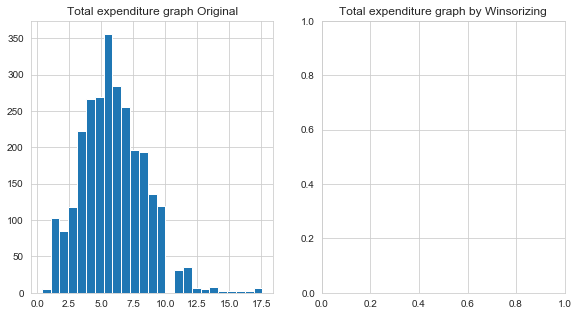

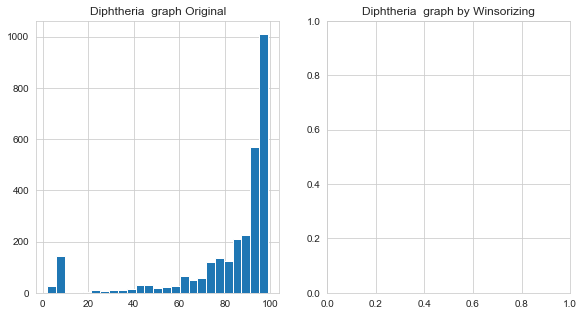

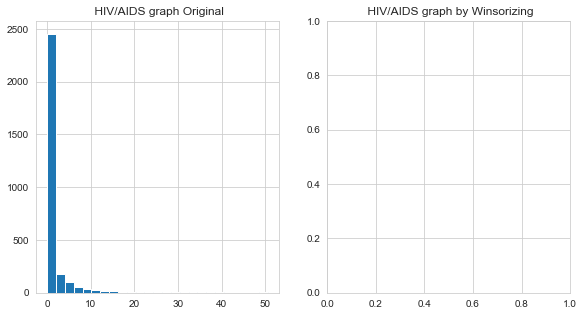

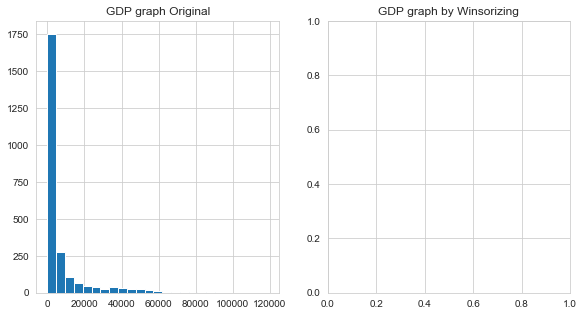

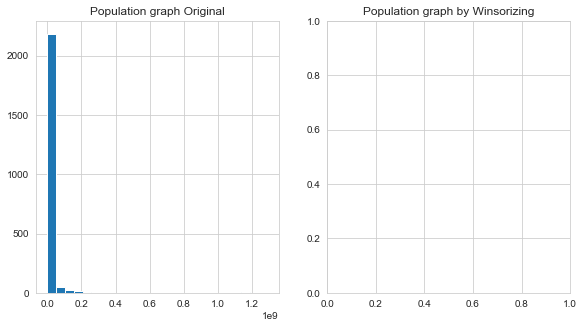

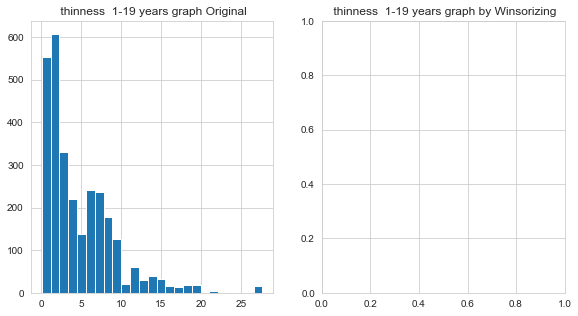

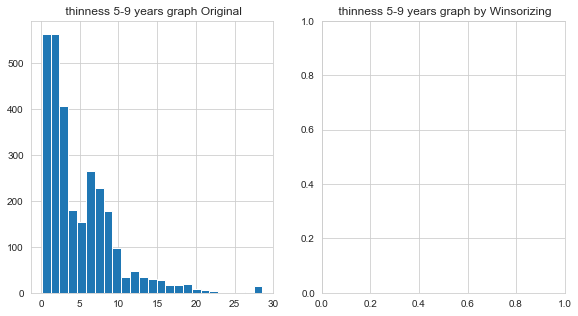

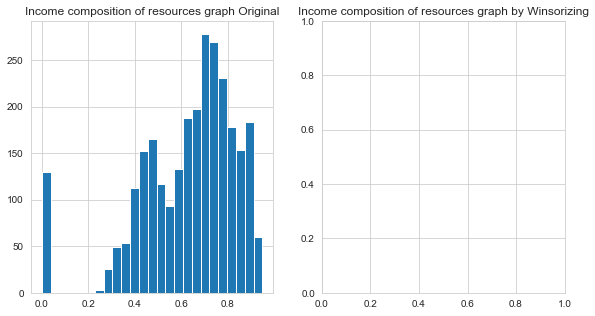

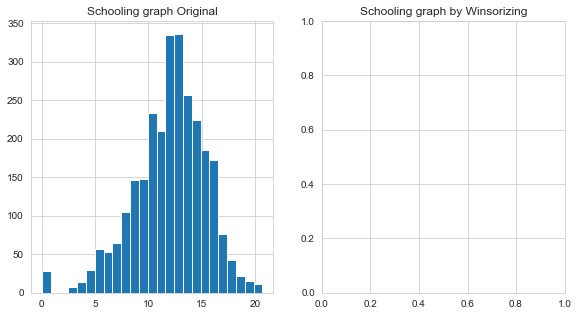

In [114]:
for i in life_df.columns[3:]:
    try: 
        plt.figure(figsize=(20,5))
        
        plt.subplot(1,4,1)
        plt.title('{} graph Original'.format(i))
        plt.hist(life_df[i], bins=25)
        
        plt.subplot(1,4,2)
        plt.title('{} graph by Winsorizing'.format(i))
        plt.hist(winsorize(life_df[i], (0.05, 0.05)), bins=25)
    
        plt.subplot(1,4,3)
        plt.title('{} graph by Log-scaled'.format(i))
        plt.hist(np.log(life_df[i]), bins=25)
    
        plt.subplot(1,4,4)
        plt.title('{} graph by Root-scaled'.format(i))
        plt.hist(np.sqrt(life_df[i]), bins=25)
        plt.show()
    except:
        print('Error')

I draw some graphs in a manner of Winsorizing, Log-scale, Root-scale.  
To sum up, there is a specific type of method which fits to the varible.
 - Original : Life expectancy, BMI, Schooling
 - Log-scale : GDP, Population, Thinness 1~19, Thinness 5~9
 - Root-scale : Adult mortality, Alcohol, Total expenditure
 - Winsorizing : Income Composition.
Others which are not mentioned above, those are not normally distributed even after cleaning. So, I would like to ignore that variables.

For the missing data, I tried to fill out the missing data with other values by considering correlation between variables each other. However, I found out that the data of a country is consisted with a series of year. In this manner, I tried to fill up the missing data through grouping by a country and interpolize it.  
However, some of countries doesn't have whole data of columns. This made me unable to interpolize it.  
Some of the missing data, I could search it through google such as GDP, population and etc.

For the outlier data, for example, Population, when I sort by population as descending manner, It show very small quantity. I think the data missing some unit on the index. Moreover, all index doesn't mention their unit. So this makes me so confusing and hard to dive into the data.

### 3. Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

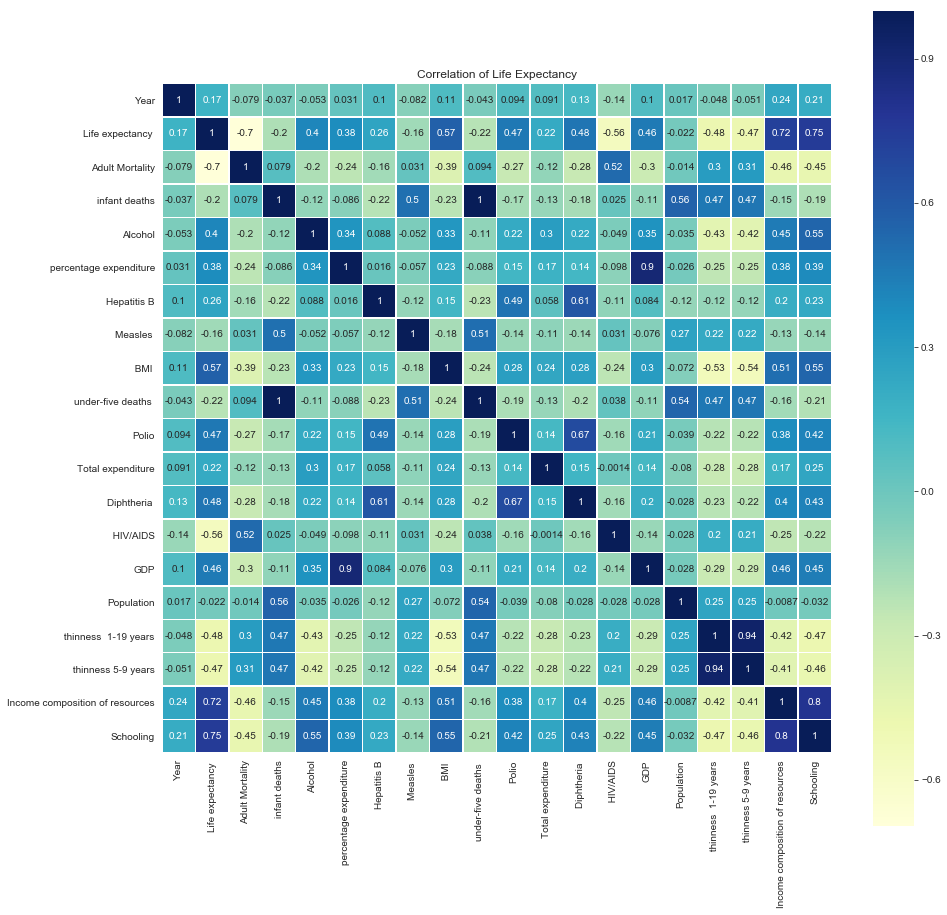

In [115]:
plt.figure(figsize=(15,15))
sns.heatmap(life_corr, square = True, annot=True, linewidths=0.5, cmap="YlGnBu")
plt.title('Correlation of Life Expectancy')
plt.show()

Let's consider that if the correlation value is over 0.5 or -0.5, then that variables are significant.  
First of all, the related variable to the life expectancy are below.  
 - Income composition of resources : 0.72
 - Schooling : 0.75
 - BMI : 0.57
This variables are quite related. It means that if the value of variable increases, then life expectancy would increase respectively.  

Second, let's see the variables negatively related to life expectancy.
 - HIV/AIDS : -0.56
 - Adult Mortality : -0.7
This variables are not quite related. It means that if the value of variable increases, then life expectancy would decrease respectively.  

### 3. In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.


I already mentioned that there are some variables which have something to do with the life expectancy: Income Composition of resources, Schooling and BMI. Also the negatively related variable would be great to be dealt for modeling: HIV/AIDS, Adult Mortality.  

I would like to choose those five variable for examining the relationship with life expectancy.

However, let's check the Principal Components of the dataset. Whether to know that making a new variable is better than using existing variables.

In [116]:
life_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [117]:
life_matrix = life_df.drop(['Country', 'Year', 'Status'], axis=1)
life_matrix.dropna(inplace=True)
life_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 19 columns):
Life expectancy                    1649 non-null float64
Adult Mortality                    1649 non-null float64
infant deaths                      1649 non-null int64
Alcohol                            1649 non-null float64
percentage expenditure             1649 non-null float64
Hepatitis B                        1649 non-null float64
Measles                            1649 non-null int64
 BMI                               1649 non-null float64
under-five deaths                  1649 non-null int64
Polio                              1649 non-null float64
Total expenditure                  1649 non-null float64
Diphtheria                         1649 non-null float64
 HIV/AIDS                          1649 non-null float64
GDP                                1649 non-null float64
Population                         1649 non-null float64
 thinness  1-19 years              1649 non-

In [118]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(life_matrix)
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix : \n', Cx)

Covariance Matrix : 
 [[ 1.0006068  -0.70294935 -0.1691764   0.40296269  0.40987939  0.2000566
  -0.06892302  0.5423705  -0.19238197  0.327493    0.17482366  0.34153835
  -0.59259566  0.4415896  -0.02231851 -0.45811601 -0.4577859   0.72152014
   0.72807156]
 [-0.70294935  1.0006068   0.042476   -0.1756416  -0.23775407 -0.10528929
  -0.00396909 -0.35175579  0.06040166 -0.19997427 -0.08527825 -0.19154492
   0.5510249  -0.25518949 -0.01502095  0.27239523  0.28689686 -0.44247161
  -0.42142609]
 [-0.1691764   0.042476    1.0006068  -0.10628137 -0.09081971 -0.23190957
   0.53300306 -0.2345674   0.99751054 -0.15702403 -0.14704029 -0.16196923
   0.00771623 -0.09815154  0.67216593  0.46369645  0.46218821 -0.13483563
  -0.21450198]
 [ 0.40296269 -0.1756416  -0.10628137  1.0006068   0.41730042  0.10995607
  -0.05014064  0.35361064 -0.1011435   0.24046036  0.21501549  0.24309885
  -0.02712909  0.44370186 -0.02889776 -0.40399999 -0.38644254  0.56141479
   0.61734919]
 [ 0.40987939 -0.23775407 -0.09

In [119]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)
eig_val_cov

array([6.13568319e+00, 2.89742064e+00, 1.84530606e+00, 1.59193266e+00,
       1.21930749e+00, 8.83500193e-01, 8.00047754e-01, 6.65595676e-01,
       2.30698835e-03, 3.88837236e-02, 1.28681446e-01, 7.09003556e-02,
       2.02966492e-01, 5.24735720e-01, 5.13008640e-01, 4.21315199e-01,
       3.90006045e-01, 3.48009560e-01, 3.31921300e-01])

In [120]:
eig_vec_cov.shape


(19, 19)

In [121]:
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i+1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[-0.32462741  0.21698642  0.20129735 -0.24502773 -0.21932267 -0.14016815
  0.1107361  -0.27003689  0.20568204 -0.18025344 -0.12906446 -0.18764488
  0.14128991 -0.23364344  0.11110947  0.2974891   0.29613951 -0.3101398
 -0.32877905]
Eigenvalue 1: 6.135683190145307
----------------------------------------
Eigenvector 2: 
[-0.19542471  0.19825858 -0.47292156 -0.12951223 -0.17637145  0.08142606
 -0.321553   -0.0330027  -0.46441371 -0.03000357  0.02794919 -0.02651725
  0.15900875 -0.18165294 -0.41845497 -0.13080891 -0.12995701 -0.18427169
 -0.14298701]
Eigenvalue 2: 2.897420637904658
----------------------------------------
Eigenvector 3: 
[ 0.04834997 -0.06402623  0.02386898 -0.10927764 -0.28919603  0.51594344
  0.0343021  -0.08100169  0.01131531  0.46881105 -0.04233911  0.50944466
 -0.10651899 -0.27283813  0.05262305  0.16575036  0.16179326  0.0007044
 -0.00604515]
Eigenvalue 3: 1.8453060597218867
----------------------------------------
Eigenvector 4: 
[ 0.23953811 -0.384

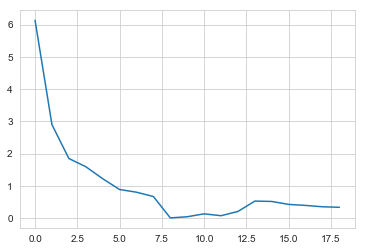

In [122]:
plt.plot(eig_val_cov)
plt.show()

In [123]:
eig_vec_cov[:,0]

array([-0.32462741,  0.21698642,  0.20129735, -0.24502773, -0.21932267,
       -0.14016815,  0.1107361 , -0.27003689,  0.20568204, -0.18025344,
       -0.12906446, -0.18764488,  0.14128991, -0.23364344,  0.11110947,
        0.2974891 ,  0.29613951, -0.3101398 , -0.32877905])

The 8 components represent almost 81.3% of the whole data.

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.32273486 0.15240335 0.09706247 0.08373512 0.06413516 0.04647181
 0.04208224 0.03501011]


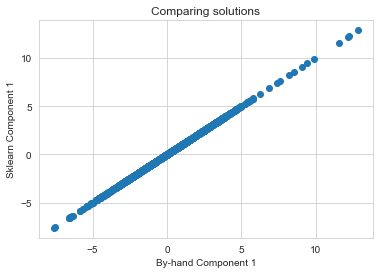

In [124]:
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components=8)
Y_sklearn = sklearn_pca.fit_transform(X)
P = eig_vec_cov[:,0]

#Change the arrangement of P matrix from row-based to column-based.
Y = P.T.dot(Xt)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

In this case, it is no good to use PCA method as following reason.

1. The life expectancy could be explained with existing variables with correlation value check up.
2. For the PCA method, you have to remove null values, then the dataset would be almost a half of raw dataset.

### 4. Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

Let's draw the highly related and not highly related variables with the life expectancy by heat map.

Income composition of resources : 0.72
Schooling : 0.75
BMI : 0.57 This variables are quite related. It means that if the value of variable increases, then life expectancy would increase respectively.
Second, let's see the variables negatively related to life expectancy.

HIV/AIDS : -0.56
Adult Mortality : -0.7 This variables are not quite related. It means that if the value of variable increases, then life expectancy would decrease respectively.

In [125]:
life_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [130]:
life_high = life_df[['Life expectancy ', 'Income composition of resources', 'Schooling', ' BMI ', ' HIV/AIDS', 'Adult Mortality']]

In [131]:
life_high.head()

Life expectancy   ...  Adult Mortality
0              65.0  ...            263.0
1              59.9  ...            271.0
2              59.9  ...            268.0
3              59.5  ...            272.0
4              59.2  ...            275.0

[5 rows x 6 columns]

In [132]:
life_high_corr = life_high.corr()

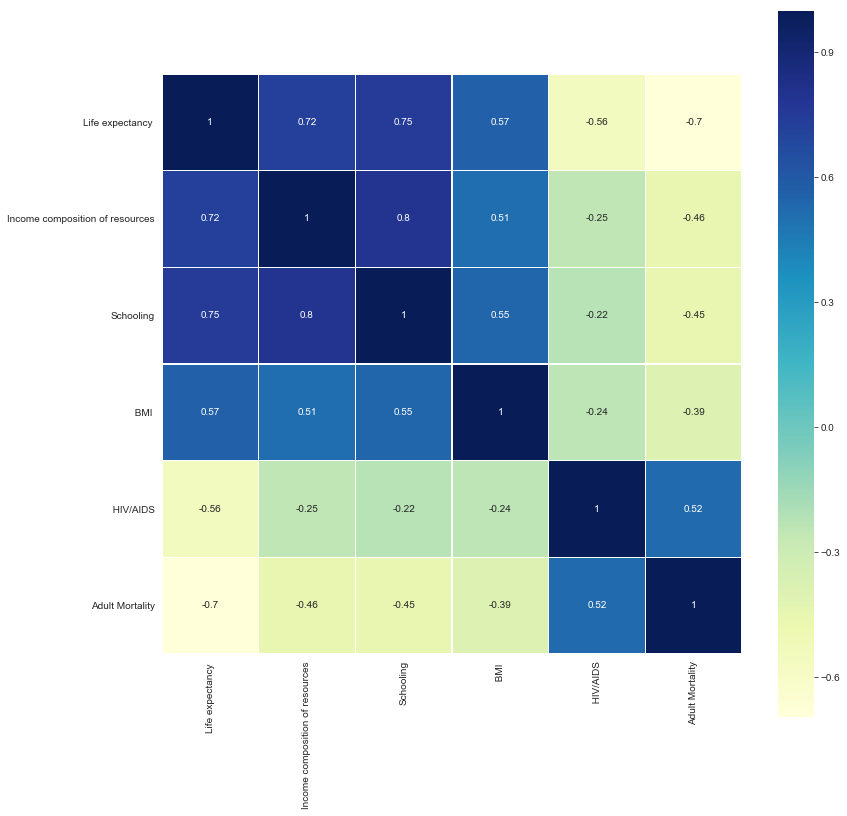

In [135]:
plt.figure(figsize=(13,13))
sns.heatmap(life_high_corr, square=True, annot=True, linewidths=0.5, cmap='YlGnBu')
plt.show()